# Analisis de Resultados: Encuesta de Uso de Servicios de Streaming de Musica

## Plataformas de Streaming de Musica por Grupo de Edad

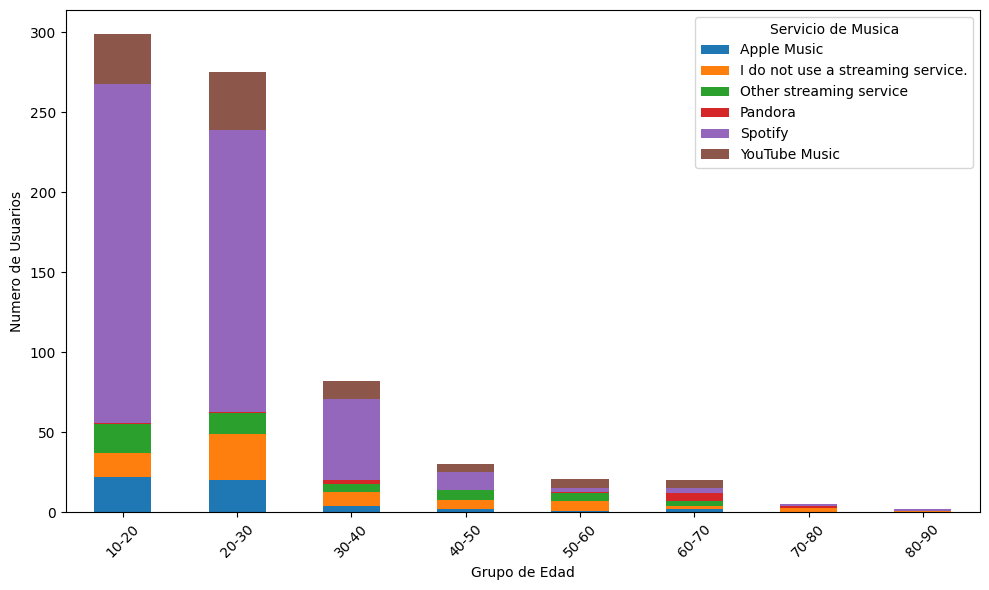

In [13]:
from imports import *

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df['decada'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

platform_counts = df.groupby(['decada', 'Primary streaming service'], observed=True).size().unstack().fillna(0)

platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Grupo de Edad')
plt.ylabel('Numero de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Servicio de Musica')
plt.tight_layout()

plt.show()

Con esta grafica dividimos por grupos de edad en decadas la tendencia de uso de cada servicio de musica.
Podemos sacar en conclusión que el servicio de musica en streaming más utilizaado es **Spotify**, sobretodo en los grupos de **10 a 30**.
A partir de los 30 sigue siendo mayor pero en mucha menor medida, y otras plataformas ganan relevancia como **Youtube Music** o **Pandora**, los cual tiene mayor presencia entre los 60 y 70.
Por ultimo, ya en el grupo de 70 en adelante predomina la elección de no utilizar servicios de streaming de musica.

## Tiempo de Escucha de Musica por Grupo de Edad

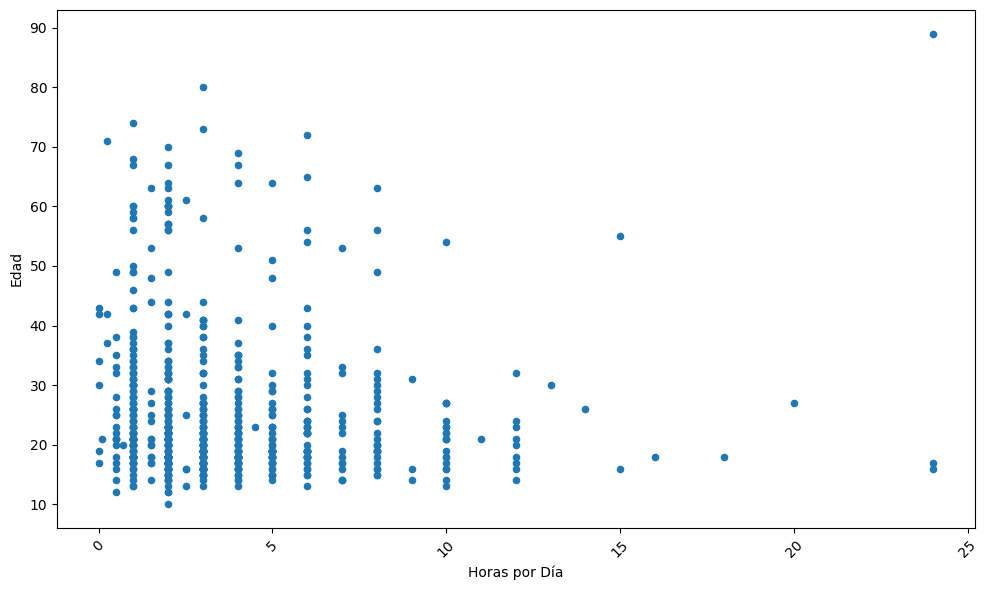

In [14]:
from imports import *

df.plot(kind='scatter', x='Hours per day', y='Age', figsize=(10, 6))

plt.xlabel('Horas por Día')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Se puede observar que entre los 10 y los 30 los usuarios tienden a escuchar hasta aproximadamente **13 horas al dia** de musica. Esta tendencia decae a partir de los 30 donde se reduce hasta menos de **10 horas al dia**. A partir de los 40 se reduce significativamente a **5 horas** y ya un menor numero de usuarios, aunque, si bien las horas no aumentan, la cantidad de usuarios que vuelven a oir musica incrementa pasados los 50.

La **conclusión final** es que las personas menores de 30 tiene el mayor tiempo de escucha de musica de aproximadamente 13 horas, que va decayendo con el paso de los años hasta menos de 10 y posteriormente 5 horas.

## Generos Mas Escuchados

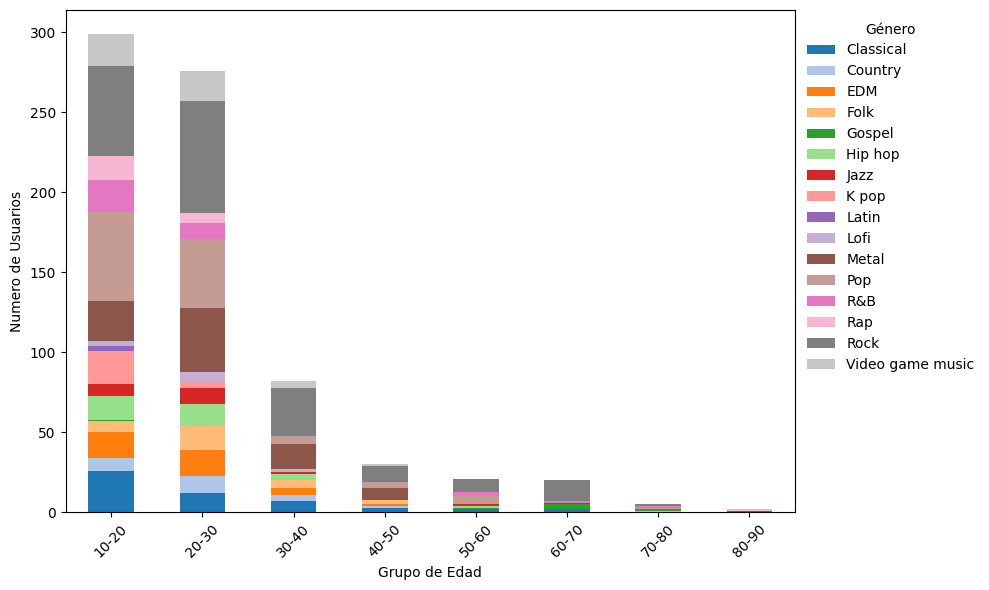

In [1]:
from imports import *

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df['decada'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

colors = plt.cm.tab20.colors

platform_counts = df.groupby(['decada', 'Fav genre'], observed=True).size().unstack()

platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.xlabel('Grupo de Edad')
plt.ylabel('Numero de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.tight_layout()

plt.show()

En este grafica si bien está dirigida a conocer las tendencias de genero musical por edades, también se aprecia la tendencia a dejar de escuchar musica.

En primer lugar, vemos como hasta los 30 los generos mas escuchados son el **rock**, el **pop** y el **metal**. A medida que la edad és mayor también muchos generos disminuyen o directamente desaparecen. Sin embargo el **rock** se mantiene hasta los 70 como genero más escuchado, y pasada esta edad ya son indistinguibles por la grafica los generos más escuchados.

## Promedio de Horas por Plataforma

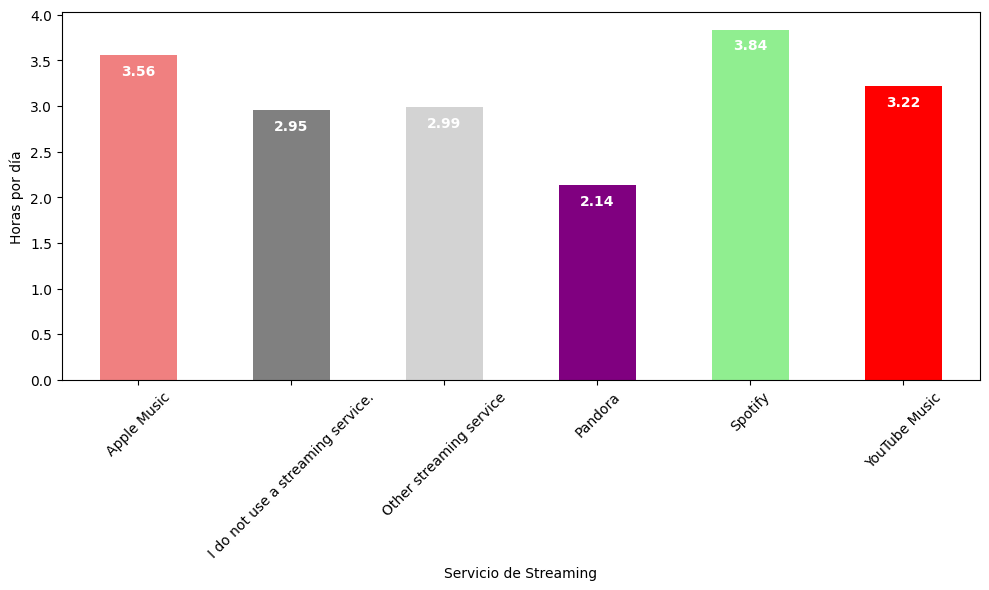

In [16]:
from imports import *

grouped_data = df.groupby('Primary streaming service')['Hours per day'].mean()

plt.figure(figsize=(10, 6))
colores = ['lightcoral', 'grey', 'lightgray', 'purple', 'lightgreen', 'red']
ax = grouped_data.plot(kind='bar', color=colores)
plt.xlabel('Servicio de Streaming')
plt.ylabel('Horas por día')
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(grouped_data):
    ax.text(i, v - 0.1, f'{v:.2f}', ha='center', va='top', fontweight='bold', color='white')

plt.show()

En esta grafica se busca mostrar la diferencia de uso promedio de cada plataforma, donde podemos apreciar que **Spotify** se lleva la mayoría con 3.84 horas de uso promedio, seguido por **Apple Music** con 3.56 horas y **Youtube Music** con 3.22 horas.

También podemos sacara que Pandora es la plataforma con menos uso, si bien tampoco destacó en la grafica de [Gráfica de Plataformas de Streaming de Musica por Grupo de Edad](#Plataformas-de-Streaming-de-Musica-por-Grupo-de-Edad), podemos ver que los pocos usuarios de la encuesta que usan Pandora tampoco habituan un uso prolongado.

## Rock y Ansiedad

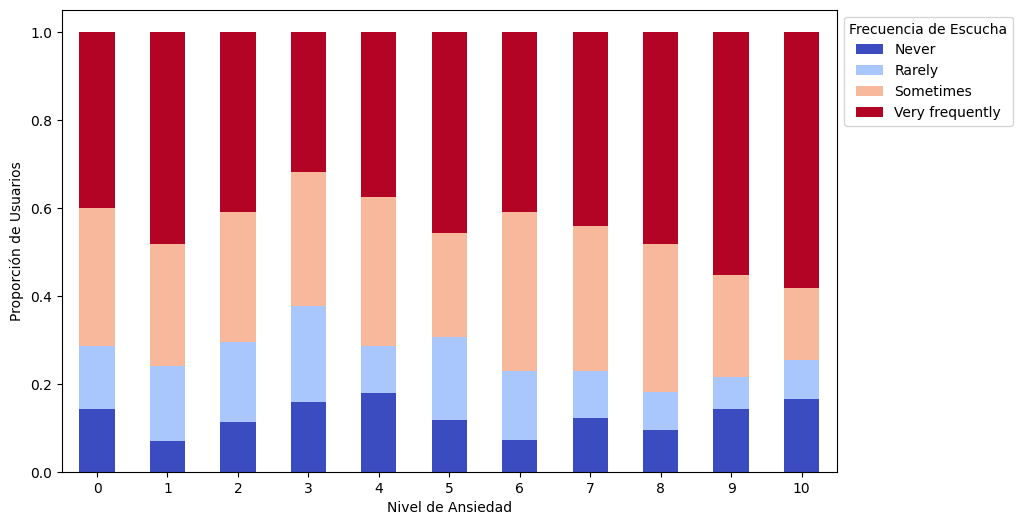

In [31]:
from imports import *

df["Anxiety"] = df["Anxiety"].round().astype(int)
ansiedad_vs_rock = df.groupby("Anxiety")["Frequency [Rock]"].value_counts(normalize=True).unstack()

ansiedad_vs_rock.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")

plt.xlabel("Nivel de Ansiedad")
plt.ylabel("Proporción de Usuarios")
plt.xticks(rotation=0)
plt.legend(title="Frecuencia de Escucha", loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.show()

En este grafico se busca relacionar la frecuencia de escucha de **rock** y la valoración propia de ansiedad de cada usuario. Podemos apreciar que los usuarios que se valoran con un 10 en ansiedad son precisamente los que escuchan rock **más frecuentemente**. Esta tendencia decrece a medida que se reduce la valoración de ansiedad de forma general, aunque a partir del 5 se eleva esta vuelve a bajar.

## Rock e Insomnio

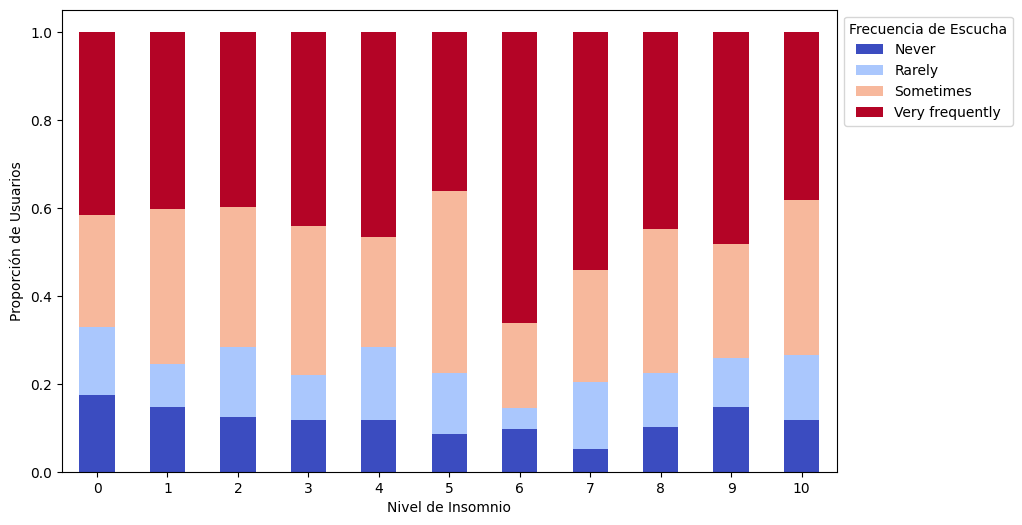

In [3]:
from imports import *

df["Insomnia"] = df["Insomnia"].round().astype(int)
insomnio_vs_lofi = df.groupby("Insomnia")["Frequency [Rock]"].value_counts(normalize=True).unstack()

insomnio_vs_lofi.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")

plt.xlabel("Nivel de Insomnio")
plt.ylabel("Proporción de Usuarios")
plt.xticks(rotation=0)
plt.legend(title="Frecuencia de Escucha", loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.show()

En este grafico se busca relacionar la frecuencia de escucha de **Rock** con el insomino, puesto que este es un genero que te mantiene en **estado de alerta**, manteniendo al cerebro despierto. Un subgenero como el **Post-rock** tiende a generar un ambiente introspectivo que fomenta los pensamientos nocturnos, aunque no te mantiene en estado de alerta, esto podria explicar la alta tendencia de escucha de este genero tanto en bajos como altos niveles de insomnio.

## Rock y Depresión

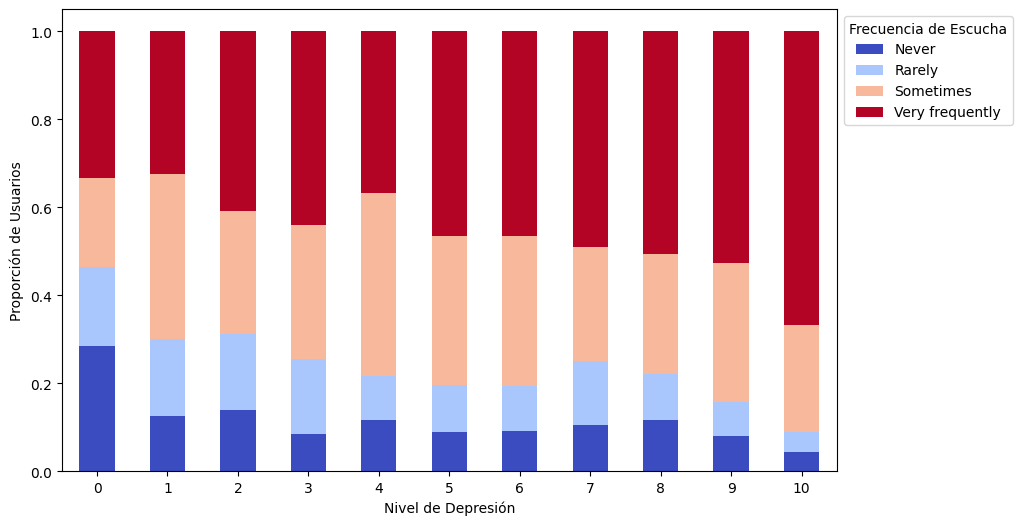

In [53]:
from imports import *

df["Depression"] = df["Depression"].round().astype(int)
insomnio_vs_lofi = df.groupby("Depression")["Frequency [Rock]"].value_counts(normalize=True).unstack()

insomnio_vs_lofi.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")

plt.xlabel("Nivel de Depresión")
plt.ylabel("Proporción de Usuarios")
plt.xticks(rotation=0)
plt.legend(title="Frecuencia de Escucha", loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.show()

Con este grafico se busca relacionar la tendencia de escucha de rock con la valoración propia de la depresión de los encuestados, en este caso se aprecia un **notable incremento** en la escucha de dicho genero a medida que aumenta la valoración de depresión. Como se vió en la [Grafica de Géneros Más Escuchados](#Generos-Mas-Escuchados) el rock es de los generos mas escuchados y no es de extrañar que tenga una tendencia común de escucha a medida que la valoracion de dichos transtornos emocionales y de sueño aumentan.

Además, se reconoce al rock como un genero que actua como **medio de expresión y catarsis** para aquellos que experimentan sentimientos negativos y utilizan este para expresar y expulsar o asimilar sus sentimientos.

In [1]:
from imports import *

columnas_especificas = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

df_filtrado = df[columnas_especificas]

conteo = (df_filtrado == "Very frequently").sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=conteo.index, y=conteo.values, palette='Blues_d')

plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de veces", fontsize=12)

plt.show()


ModuleNotFoundError: No module named 'seaborn'